In [22]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng

import itertools

RNG = default_rng()

# [Voronoi Diagrams](https://en.wikipedia.org/wiki/Voronoi_diagram#Applications)
## What is a Voronoi Diagram?
A Voronoi diagram (on $\mathbb{R}^2$) is a way to cut space into regions close to points. If we have points $p_1, \ldots, p_n$ in $\mathbb{R}^2$, the Voronoi cell $R_i$ is the set of all points closest to $p_i$ i.e.,
$$R_i = \{p \in \mathbb{R}^2: d(p, p_i) \leq d(p, p_j) \text{ for any $j = 1, \ldots, n$}\}.$$

If this is not already clear, pictures later in the notebook will be illuminating.

## Why should I care?

If you're not a pure mathematician, you may ask yourself _why should I care_? Triangulation is useful in many fields ranging from archeology, art history, to meteorology. [TODO]

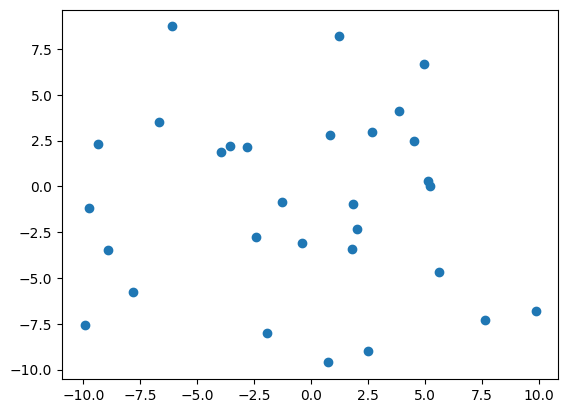

In [23]:
bounds = (-10, 10)
dim = 2
num_points = 30
points = RNG.uniform(*bounds, size=(30, dim))
plt.scatter(points[:, 0], points[:, 1])

# [Fortune's Algorithm](https://en.wikipedia.org/wiki/Fortune%27s_algorithm)

In [24]:
np.outer()
distances = np.linalg.norm()

TypeError: _outer_dispatcher() missing 2 required positional arguments: 'a' and 'b'